# 3. Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Load the data
data = pd.read_csv("../dataset/weather_data_formatted_weekly_rename_station_column_with_trend_words.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.head()

,Year,Week,cases,Ang Mo Kio_Weekly Rainfall (mm),Ang Mo Kio_Weekly Mean Temperature (°C),Ang Mo Kio_Weekly Maximum Temperature (°C),Ang Mo Kio_Weekly Minimum Temperature (°C),Ang Mo Kio_Weekly Mean Wind Speed (km/h),Ang Mo Kio_Weekly Maximum Wind Speed (km/h),Changi_Weekly Rainfall (mm),Changi_Weekly Mean Temperature (°C),Changi_Weekly Maximum Temperature (°C),Changi_Weekly Minimum Temperature (°C),Changi_Weekly Mean Wind Speed (km/h),Changi_Weekly Maximum Wind Speed (km/h),Clementi_Weekly Rainfall (mm),Clementi_Weekly Mean Wind Speed (km/h),Clementi_Weekly Maximum Wind Speed (km/h),East Coast Parkway_Weekly Rainfall (mm),Jurong Island_Weekly Rainfall (mm),Khatib_Weekly Rainfall (mm),Marina Barrage_Weekly Rainfall (mm),Pasir Panjang_Weekly Rainfall (mm),Pasir Panjang_Weekly Mean Temperature (°C),Pasir Panjang_Weekly Maximum Temperature (°C),Pasir Panjang_Weekly Minimum Temperature (°C),Pasir Panjang_Weekly Mean Wind Speed (km/h),Pasir Panjang_Weekly Maximum Wind Speed (km/h),Tai Seng_Weekly Rainfall (mm),Tai Seng_Weekly Mean Temperature (°C),Tai Seng_Weekly Maximum Temperature (°C),Tai Seng_Weekly Minimum Temperature (°C),Tai Seng_Weekly Mean Wind Speed (km/h),Tai Seng_Weekly Maximum Wind Speed (km/h),Tuas South_Weekly Rainfall (mm),Tuas South_Weekly Maximum Temperature (°C),Tuas South_Weekly Minimum Temperature (°C),Tuas South_Weekly Mean Wind Speed (km/h),Tuas South_Weekly Maximum Wind Speed (km/h),Botanic Garden_Weekly Rainfall (mm),Buangkok_Weekly Rainfall (mm),Bukit Panjang_Weekly Rainfall (mm),Buona Vista_Weekly Rainfall (mm),Choa Chu Kang (Central)_Weekly Rainfall (mm),Choa Chu Kang (West)_Weekly Rainfall (mm),Jurong Pier_Weekly Rainfall (mm),Kent Ridge_Weekly Rainfall (mm),Macritchie Reservoir_Weekly Rainfall (mm),Mandai_Weekly Rainfall (mm),Nicoll Highway_Weekly Rainfall (mm),Paya Lebar_Weekly Rainfall (mm),Paya Lebar_Weekly Maximum Temperature (°C),Paya Lebar_Weekly Minimum Temperature (°C),Paya Lebar_Weekly Mean Wind Speed (km/h),Paya Lebar_Weekly Maximum Wind Speed (km/h),Punggol_Weekly Rainfall (mm),Queenstown_Weekly Rainfall (mm),Seletar_Weekly Rainfall (mm),Seletar_Weekly Mean Wind Speed (km/h),Seletar_Weekly Maximum Wind Speed (km/h),Sembawang_Weekly Rainfall (mm),Sembawang_Weekly Maximum Temperature (°C),Sembawang_Weekly Minimum Temperature (°C),Sembawang_Weekly Mean Wind Speed (km/h),Serangoon_Weekly Rainfall (mm),Somerset (Road)_Weekly Rainfall (mm),Tanjong Katong_Weekly Rainfall (mm),Tengah_Weekly Rainfall (mm),Tengah_Weekly Maximum Temperature (°C),Tengah_Weekly Minimum Temperature (°C),Tengah_Weekly Mean Wind Speed (km/h),Tengah_Weekly Maximum Wind Speed (km/h),Toa Payoh_Weekly Rainfall (mm),Ulu Pandan_Weekly Rainfall (mm),Upper Peirce Reservoir_Weekly Rainfall (mm),Upper Thomson_Weekly Rainfall (mm),Whampoa_Weekly Rainfall (mm),Dengue fever: (Singapore),Headache: (Singapore),Nausea: (Singapore),vomitting: (Singapore),muscle ache: (Singapore),rashes: (Singapore),Mosquito bite: (Singapore)
0,2014,1,437,55.6,25.971429,31.8,23.3,5.257143,31.0,57.2,26.171429,31.8,23.3,7.142857,34.9,44.8,4.300000,35.3,44.6,50.8,93.4,60.2,40.2,26.700000,31.7,23.8,10.585714,45.0,36.0,26.714286,31.6,24.1,8.071429,40.0,34.6,31.7,23.2,6.614286,66.2,43.6,46.0,63.8,39.0,65.4,56.4,60.0,39.4,48.0,81.2,56.0,47.7,33.0,23.8,10.642857,50.0,59.2,37.2,54.2,9.271429,44.3,104.2,31.9,22.5,8.214286,58.3,43.8,88.0,88.4,32.4,22.6,10.300000,42.5,47.4,13.2,62.6,49.4,52.6,53,69,43,0,29,87,0
1,2014,2,479,0.8,25.785714,29.4,23.5,9.185714,41.4,18.2,26.271429,30.3,23.7,12.914286,40.0,0.2,7.400000,43.2,6.2,2.0,0.6,2.4,1.0,26.642857,30.4,24.4,15.700000,50.4,6.6,26.528571,29.7,24.5,15.885714,46.4,0.0,30.9,24.0,8.014286,28.1,0.0,3.0,0.6,0.0,1.4,3.8,6.4,0.0,0.6,0.2,1.8,5.4,30.6,23.8,18.957143,48.2,6.8,0.0,6.0,19.742857,50.0,0.6,30.3,21.1,14.314286,2.0,1.0,7.2,2.7,30.6,22.0,16.814286,46.4,1.6,0.0,0.4,0.2,1.4,55,70,79,30,34,39,0
2,2014,3,401,0.0,25.385714,29.3,22.9,9.300000,38.9,0.0,25.757143,29.4,23.2,12.157143,41.4,0.0,6.871429,38.2,0.0,0.0,0.0,0.0,0.0,26.200

In [3]:
# Clean feature names to replace special characters with underscore
clean = lambda x: x.lower().replace(' ', '_').replace('.', '_').replace('(', '_').replace(')', '_').replace(':', '_')
data = data.rename(columns=clean)
data.head()

,year,week,cases,ang_mo_kio_weekly_rainfall__mm_,ang_mo_kio_weekly_mean_temperature__°c_,ang_mo_kio_weekly_maximum_temperature__°c_,ang_mo_kio_weekly_minimum_temperature__°c_,ang_mo_kio_weekly_mean_wind_speed__km/h_,ang_mo_kio_weekly_maximum_wind_speed__km/h_,changi_weekly_rainfall__mm_,changi_weekly_mean_temperature__°c_,changi_weekly_maximum_temperature__°c_,changi_weekly_minimum_temperature__°c_,changi_weekly_mean_wind_speed__km/h_,changi_weekly_maximum_wind_speed__km/h_,clementi_weekly_rainfall__mm_,clementi_weekly_mean_wind_speed__km/h_,clementi_weekly_maximum_wind_speed__km/h_,east_coast_parkway_weekly_rainfall__mm_,jurong_island_weekly_rainfall__mm_,khatib_weekly_rainfall__mm_,marina_barrage_weekly_rainfall__mm_,pasir_panjang_weekly_rainfall__mm_,pasir_panjang_weekly_mean_temperature__°c_,pasir_panjang_weekly_maximum_temperature__°c_,pasir_panjang_weekly_minimum_temperature__°c_,pasir_panjang_weekly_mean_wind_speed__km/h_,pasir_panjang_weekly_maximum_wind_speed__km/h_,tai_seng_weekly_rainfall__mm_,tai_seng_weekly_mean_temperature__°c_,tai_seng_weekly_maximum_temperature__°c_,tai_seng_weekly_minimum_temperature__°c_,tai_seng_weekly_mean_wind_speed__km/h_,tai_seng_weekly_maximum_wind_speed__km/h_,tuas_south_weekly_rainfall__mm_,tuas_south_weekly_maximum_temperature__°c_,tuas_south_weekly_minimum_temperature__°c_,tuas_south_weekly_mean_wind_speed__km/h_,tuas_south_weekly_maximum_wind_speed__km/h_,botanic_garden_weekly_rainfall__mm_,buangkok_weekly_rainfall__mm_,bukit_panjang_weekly_rainfall__mm_,buona_vista_weekly_rainfall__mm_,choa_chu_kang__central__weekly_rainfall__mm_,choa_chu_kang__west__weekly_rainfall__mm_,jurong_pier_weekly_rainfall__mm_,kent_ridge_weekly_rainfall__mm_,macritchie_reservoir_weekly_rainfall__mm_,mandai_weekly_rainfall__mm_,nicoll_highway_weekly_rainfall__mm_,paya_lebar_weekly_rainfall__mm_,paya_lebar_weekly_maximum_temperature__°c_,paya_lebar_weekly_minimum_temperature__°c_,paya_lebar_weekly_mean_wind_speed__km/h_,paya_lebar_weekly_maximum_wind_speed__km/h_,punggol_weekly_rainfall__mm_,queenstown_weekly_rainfall__mm_,seletar_weekly_rainfall__mm_,seletar_weekly_mean_wind_speed__km/h_,seletar_weekly_maximum_wind_speed__km/h_,sembawang_weekly_rainfall__mm_,sembawang_weekly_maximum_temperature__°c_,sembawang_weekly_minimum_temperature__°c_,sembawang_weekly_mean_wind_speed__km/h_,serangoon_weekly_rainfall__mm_,somerset__road__weekly_rainfall__mm_,tanjong_katong_weekly_rainfall__mm_,tengah_weekly_rainfall__mm_,tengah_weekly_maximum_temperature__°c_,tengah_weekly_minimum_temperature__°c_,tengah_weekly_mean_wind_speed__km/h_,tengah_weekly_maximum_wind_speed__km/h_,toa_payoh_weekly_rainfall__mm_,ulu_pandan_weekly_rainfall__mm_,upper_peirce_reservoir_weekly_rainfall__mm_,upper_thomson_weekly_rainfall__mm_,whampoa_weekly_rainfall__mm_,dengue_fever___singapore_,headache___singapore_,nausea___singapore_,vomitting___singapore_,muscle_ache___singapore_,rashes___singapore_,mosquito_bite___singapore_
0,2014,1,437,55.6,25.971429,31.8,23.3,5.257143,31.0,57.2,26.171429,31.8,23.3,7.142857,34.9,44.8,4.300000,35.3,44.6,50.8,93.4,60.2,40.2,26.700000,31.7,23.8,10.585714,45.0,36.0,26.714286,31.6,24.1,8.071429,40.0,34.6,31.7,23.2,6.614286,66.2,43.6,46.0,63.8,39.0,65.4,56.4,60.0,39.4,48.0,81.2,56.0,47.7,33.0,23.8,10.642857,50.0,59.2,37.2,54.2,9.271429,44.3,104.2,31.9,22.5,8.214286,58.3,43.8,88.0,88.4,32.4,22.6,10.300000,42.5,47.4,13.2,62.6,49.4,52.6,53,69,43,0,29,87,0
1,2014,2,479,0.8,25.785714,29.4,23.5,9.185714,41.4,18.2,26.271429,30.3,23.7,12.914286,40.0,0.2,7.400000,43.2,6.2,2.0,0.6,2.4,1.0,26.642857,30.4,24.4,15.700000,50.4,6.6,26.528571,29.7,24.5,15.885714,46.4,0.0,30.9,24.0,8.014286,28.1,0.0,3.0,0.6,0.0,1.4,3.8,6.4,0.0,0.6,0.2,1.8,5.4,30.6,23.8,18.957143,48.2,6.8,0.0,6.0,19.742857,50.0,0.6,30.3,21.1,14.314286,2.0,1.0,7.2,2.7,30.6,22.0,16.814286,46.4,1.6,0.0,0.4,0.2,1.4,55,70,79,30,34,39,0
2,2014,3,401,0.0,25.385714,29.3,22.9,9.300000,38.9,0.0,25.757143,29.4,23.2,12.157143,41.4,0.0,6.871429,38.2,0.0,0.0,0.0,0.0,0.0,26.200

In [4]:
# Define the features and target variable
features = data.drop(['cases'], axis = 'columns')
target = data["cases"]

In [5]:
print(f'Number of observations: {len(data)}')
print(f'Number of training observations: {round(len(data) * 0.75)}')
print(f'Number of testing observations: {len(data) - round(len(data) * 0.75)}')


Number of observations: 260
Number of training observations: 195
Number of testing observations: 65


In [6]:
train_data = data.iloc[:196,]
test_data = data.iloc[196:,]

---

### XGBoost

In [7]:
X_train = train_data.drop(['cases'], axis = 'columns')
y_train = train_data['cases']
X_test = test_data.drop(['cases'], axis = 'columns')
y_test = test_data['cases']

In [8]:
# Standardize input features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [9]:
# Define model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.75, 1.0]
}

In [10]:
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best score: -4.696010029823393


In [11]:
# Use the best model to predict new data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

RMSE: 56.87
Mean Squared Error: 3233.9110087425474
Mean Absolute Error: 38.57255604863167


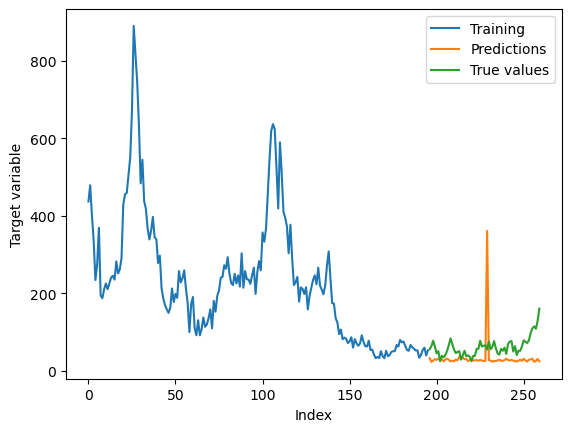

In [12]:
# Get the index of the test set
train_index = X_train.index
test_index = X_test.index

# Create a line plot of the predictions and true values against the index
plt.plot(train_index, y_train, label='Training')
plt.plot(test_index, y_pred, label='Predictions')
plt.plot(test_index, y_test, label='True values')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.legend()
plt.show()

In [13]:
# Get the feature importances
importances = best_model.feature_importances_
feature_names = X_train.columns.tolist()
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances.sort_values('importance', ascending=False, inplace=True)
print(feature_importances)

                                           feature  importance
76                       dengue_fever___singapore_    0.458974
0                                             year    0.122686
10          changi_weekly_maximum_temperature__°c_    0.086320
15          clementi_weekly_mean_wind_speed__km/h_    0.027848
30        tai_seng_weekly_minimum_temperature__°c_    0.021019
62         sembawang_weekly_mean_wind_speed__km/h_    0.020360
26  pasir_panjang_weekly_maximum_wind_speed__km/h_    0.017477
42    choa_chu_kang__central__weekly_rainfall__mm_    0.015534
31          tai_seng_weekly_mean_wind_speed__km/h_    0.011445
67          tengah_weekly_maximum_temperature__°c_    0.011229
43       choa_chu_kang__west__weekly_rainfall__mm_    0.010305
1                                             week    0.010112
34      tuas_south_weekly_maximum_temperature__°c_    0.009751
77                           headache___singapore_    0.009577
46       macritchie_reservoir_weekly_rainfall__mm_    0

---
### LightGBM

In [14]:
# Define the features and target variable
features = data.drop(['cases'], axis = 'columns')
target = data["cases"]

In [15]:
print(f'Number of observations: {len(data)}')
print(f'Number of training observations: {round(len(data) * 0.75)}')
print(f'Number of testing observations: {len(data) - round(len(data) * 0.75)}')


Number of observations: 260
Number of training observations: 195
Number of testing observations: 65


In [16]:
train_data = data.iloc[:196,]

test_data = data.iloc[196:,]

In [17]:
X_train = train_data.drop(['cases'], axis = 'columns')
y_train = train_data['cases']
X_test = test_data.drop(['cases'], axis = 'columns')
y_test = test_data['cases']

In [18]:
# Standardize input features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [19]:
# Prepare the LGBM datasets
train_dataset = lgb.Dataset(X_train_scaled, label=y_train)
test_dataset = lgb.Dataset(X_test_scaled, label=y_test)

In [20]:
# Set the LGBM hyperparameters
params = {
    "objective": "regression",
    "metric": "rmse",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": -1
}

In [21]:
# Train the LGBM model
model = lgb.train(params, train_dataset, num_boost_round=1000, valid_sets=[train_dataset, test_dataset], early_stopping_rounds=50)

[1]	training's rmse: 157.792	valid_1's rmse: 160.847
Training until validation scores don't improve for 50 rounds
[2]	training's rmse: 154.238	valid_1's rmse: 152.69
[3]	training's rmse: 150.201	valid_1's rmse: 145.27
[4]	training's rmse: 147.172	valid_1's rmse: 137.932
[5]	training's rmse: 143.547	valid_1's rmse: 131.3
[6]	training's rmse: 139.527	valid_1's rmse: 125.079
[7]	training's rmse: 135.808	valid_1's rmse: 119.226
[8]	training's rmse: 132.372	valid_1's rmse: 113.727
[9]	training's rmse: 129.033	valid_1's rmse: 108.625
[10]	training's rmse: 126.044	valid_1's rmse: 103.854
[11]	training's rmse: 122.707	valid_1's rmse: 99.6573
[12]	training's rmse: 119.989	valid_1's rmse: 99.647
[13]	training's rmse: 117.328	valid_1's rmse: 95.7492
[14]	training's rmse: 114.543	valid_1's rmse: 93.2074
[15]	training's rmse: 112.002	valid_1's rmse: 89.8459
[16]	training's rmse: 110.13	valid_1's rmse: 86.3771
[17]	training's rmse: 108.486	valid_1's rmse: 83.1491
[18]	training's rmse: 106.832	valid_

In [22]:
# Evaluate the model performance
y_pred = model.predict(X_test_scaled, num_iteration=model.best_iteration)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print('Mean Squared Error:', mse)

RMSE: 53.46
Mean Squared Error: 2857.630115303528


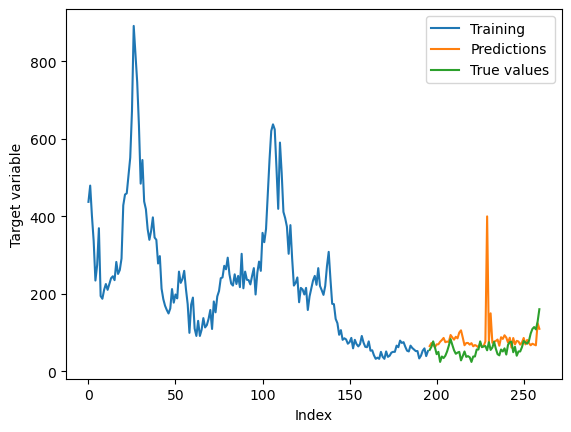

In [23]:
# Get the index of the test set
train_index = X_train.index
test_index = X_test.index

# Create a line plot of the predictions and true values against the index
plt.plot(train_index, y_train, label='Training')
plt.plot(test_index, y_pred, label='Predictions')
plt.plot(test_index, y_test, label='True values')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.legend()
plt.show()

---
### SVM

In [24]:
# Define the features and target variable
features = data.drop(['cases'], axis = 'columns')
target = data["cases"]

In [25]:
print(f'Number of observations: {len(data)}')
print(f'Number of training observations: {round(len(data) * 0.75)}')
print(f'Number of testing observations: {len(data) - round(len(data) * 0.75)}')


Number of observations: 260
Number of training observations: 195
Number of testing observations: 65


In [26]:
train_data = data.iloc[:196,]

test_data = data.iloc[196:,]

In [27]:
X_train = train_data.drop(['cases'], axis = 'columns')
y_train = train_data['cases']
X_test = test_data.drop(['cases'], axis = 'columns')
y_test = test_data['cases']

In [28]:
# Standardize input features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [29]:
svr = SVR()
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled,y_train)
best_model = grid_search.best_estimator_
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

NameError: name 'SVR' is not defined

In [ ]:
y_pred = best_model.predict(X_test_scaled)

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

In [ ]:
#best_model.dual_coef_
#best_model.fit_status_
#best_model.intercept_ #array([207.95113297])
#best_model.n_features_in_ #83
#best_model.n_iter_ #640
#best_model.shape_fit_ (196, 83)
#best_model.support_ array([0 to 195])
#best_model.support_vectors_

In [ ]:
# Get the index of the test set
train_index = X_train.index
test_index = X_test.index

# Create a line plot of the predictions and true values against the index
plt.plot(train_index, y_train, label='Training')
plt.plot(test_index, y_pred, label='Predictions')
plt.plot(test_index, y_test, label='True values')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.legend()
plt.show()

In [ ]:
###


---
### Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [ ]:
# Define the features and target variable
features = data.drop(['cases'], axis = 'columns')
target = data["cases"]

In [ ]:
print(f'Number of observations: {len(data)}')
print(f'Number of training observations: {round(len(data) * 0.75)}')
print(f'Number of testing observations: {len(data) - round(len(data) * 0.75)}')


In [ ]:
train_data = data.iloc[:196,]

test_data = data.iloc[196:,]

In [ ]:
X_train = train_data.drop(['cases'], axis = 'columns')
y_train = train_data['cases']
X_test = test_data.drop(['cases'], axis = 'columns')
y_test = test_data['cases']

In [ ]:
# Standardize input features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
rf= RandomForestRegressor()

In [ ]:
rf_params = {'n_estimators': [20,40,60,80], 'max_depth': [None, 1, 2, 3, 4, 5]}
grid_search = GridSearchCV(rf, param_grid=rf_params, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

In [ ]:
y_pred = best_model.predict(X_test_scaled)

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

In [ ]:
#best_model.dual_coef_
#best_model.fit_status_
#best_model.intercept_ #array([207.95113297])
#best_model.n_features_in_ #83
#best_model.n_iter_ #640
#best_model.shape_fit_ (196, 83)
#best_model.support_ array([0 to 195])
#best_model.support_vectors_

In [ ]:
# Get the index of the test set
train_index = X_train.index
test_index = X_test.index

# Create a line plot of the predictions and true values against the index
plt.plot(train_index, y_train, label='Training')
plt.plot(test_index, y_pred, label='Predictions')
plt.plot(test_index, y_test, label='True values')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.legend()
plt.show()

In [ ]:
rf_features=pd.DataFrame({'feature':X_train.columns,'feature_importance': best_model.feature_importances_})
rf_features.sort_values(by='feature_importance',ascending=False).head(10)